In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Part 1

### Particle gun: 20 electrons with energy 300 MeV

In [78]:
col_names = ["TrueEnergy", "Layer1", "Layer2", "Layer3", "Layer4", "Layer5"]

In [79]:
layers = col_names[1:]

In [80]:
detector_energies_e = pd.read_csv("output_nt_Energy(electrons).csv",comment="#",
                                header=None,names=col_names,dtype="float")

In [81]:
print("Total events: ",detector_energies_e.shape[0])

Total events:  20


In [82]:
#Total energy deposited in each layer
total_energy_e = detector_energies_e[layers].values.sum(axis=0)

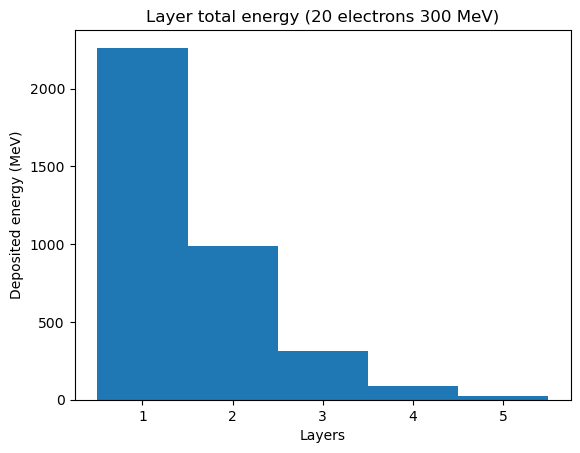

In [83]:
layer_pos = [1,2,3,4,5]
plt.bar(layer_pos, height=total_energy_e,width=1)
plt.title("Layer total energy (20 electrons 300 MeV)")
plt.xlabel("Layers")
plt.ylabel("Deposited energy (MeV)")
plt.show()

### Particle gun: 20 neutrons with energy 300 MeV

In [84]:
detector_energies_n = pd.read_csv("output_nt_Energy(neutrons).csv",comment="#",
                                header=None,names=col_names,dtype="float")

In [85]:
print("Total events: ",detector_energies_n.shape[0])

Total events:  20


In [86]:
#Total energy deposited in each layer
total_energy_n = detector_energies_n[layers].values.sum(axis=0)

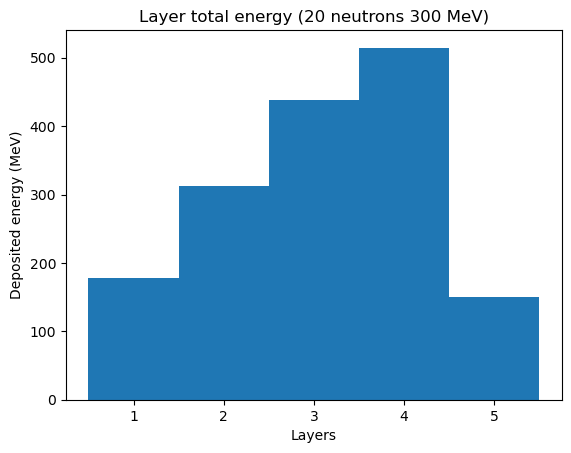

In [87]:
layer_pos = [1,2,3,4,5]
plt.bar(layer_pos, height=total_energy_n,width=1)
plt.title("Layer total energy (20 neutrons 300 MeV)")
plt.xlabel("Layers")
plt.ylabel("Deposited energy (MeV)")
plt.show()

## Energy calibration (500 electrons 300 MeV)

In [96]:
detector_energies_500 = pd.read_csv("output_nt_Energy(500electrons).csv",comment="#",
                                header=None,names=col_names,dtype="float")

In [117]:
E_true = detector_energies_500[col_names[0]]

In [118]:
E_detected = detector_energies_500[layers].values.sum(axis=1)

In [146]:
calibration = np.average(E_true/E_detected)

In [147]:
E_calibrated = E_detected*calibration

In [153]:
calibration_diff = (E_calibrated-E_true)/E_true

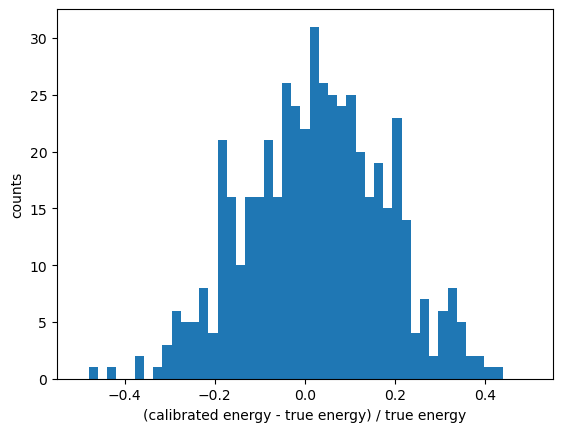

In [154]:
plt.hist(calibration_diff,bins=np.linspace(-0.5,0.5,50))
plt.xlabel("(calibrated energy - true energy) / true energy")
plt.ylabel("counts")
plt.show()

In [156]:
detector_resolution = np.std(calibration_diff)

In [158]:
print("The detector resolution is: ",round(detector_resolution,5))

The detector resolution is:  0.15569


## 2D Histrogram of energy calibration

1000 electrons fired, energy incremented by 100MeV from 300MeV to 100200MeV 

In [160]:
detector_energies_increment = pd.read_csv("output_nt_Energy(100MeV_increment).csv",comment="#",
                                header=None,names=col_names,dtype="float")

Calculating the calibration quality for each event

In [162]:
E_true = detector_energies_increment[col_names[0]]

In [167]:
E_detected = detector_energies_increment[layers].values.sum(axis=1)

In [173]:
calibration = np.average(E_true/E_detected)

In [174]:
E_calibrated = E_detected*calibration

In [175]:
calibration_quality = (E_calibrated-E_true)/E_true

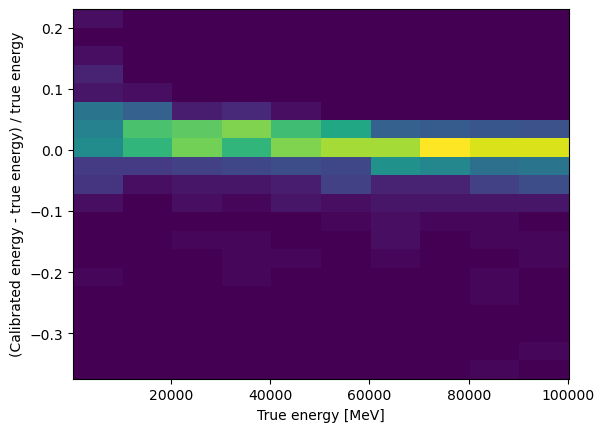

In [189]:
plt.hist2d( x=E_true, y=calibration_quality, bins=(10, 20) )
plt.ylabel("(Calibrated energy - true energy) / true energy")
plt.xlabel("True energy [MeV]")
plt.show()

#### Describe what beam energy values you used

The beam energy values are chosen to start from 300 MeV and increment by 100 MeV for each new particle being fired. The beam energy values were incremented by 100 MeV for 1000 times, reaching a maximum of 100200 MeV.

## Part 2

#### Firing 300 MeV electrons

### Count the number of positrons produced by photon conversion in an event

Terminal output for single event:

In [182]:
from IPython.display import Image

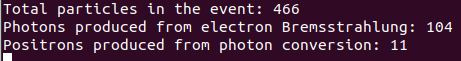

In [184]:
Image("positrons_from_photon_conv.png")

### Calculate the fraction of the total *detected* energy in an event that was deposited by electrons. 

Fraction of the detected energy deposited by electrons in each layer of the detector (single event)

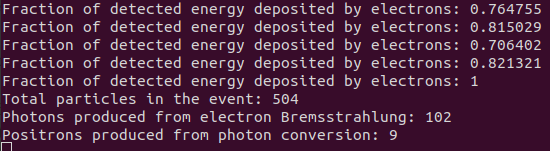

In [187]:
Image("Electron_energy_fraction_terminal.png")

Histogram of the fraction of energy deposited by electrons in each layer of the detector (single event)

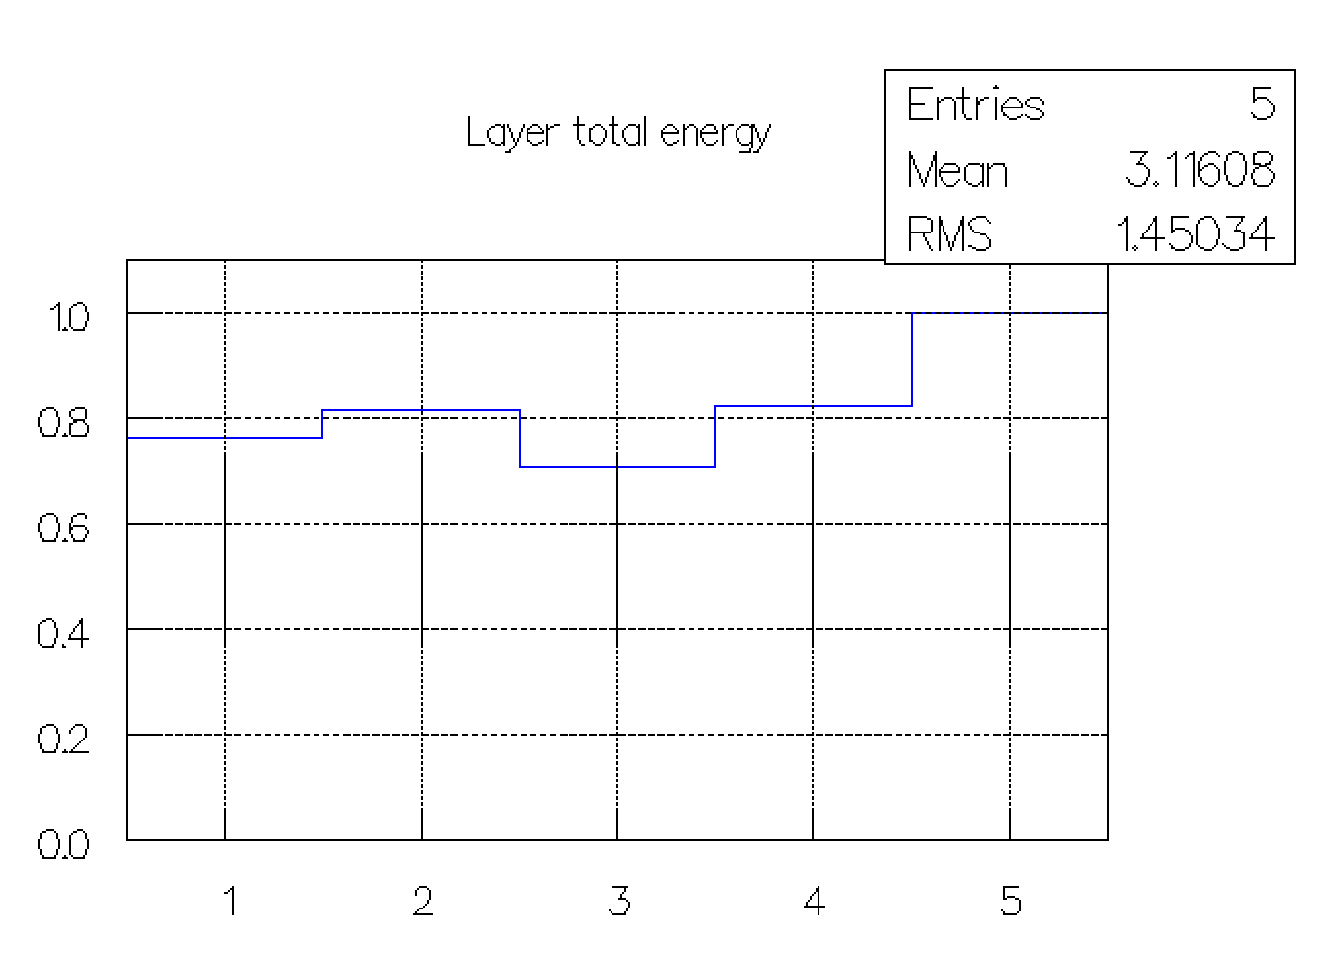

In [188]:
Image("Electron_energy_fraction_histogram.png")